# Gathering of Bayesian evidence for the ELM model

In [1]:
import pickle
from pathlib import Path
import numpy as np
from periodictable import elements
from matplotlib import pyplot as plt

In [2]:
import exfor_tools
import jitr

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
db = exfor_tools.get_db()

In [4]:
# targets to consider
Ca48 = (48, 20)
Pb208 = (208, 82)

Zr90 = (90, 40)
Zr92 = (92, 40)

Sn112 = (112,50)
Sn114 = (114,50)
Sn116 = (116,50)
Sn118 = (118, 50)
Sn120 = (120, 50)
Sn122 = (122, 50)
Sn124 = (124, 50)

targets = [
    Ca48, 
    Zr90,
    Zr92,
    Sn112, 
    Sn114, 
    Sn116, 
    Sn118, 
    Sn120,
    Sn122, 
    Sn124, 
    Pb208
]

In [5]:
measurements = dict([ (t , []) for t in targets  ])

In [6]:
proton = (1, 1)
neutron = (1, 0)

In [7]:
QIAS = {}
QIAS[Ca48] = -7.182
QIAS[Zr90] = -11.901
QIAS[Zr92] = -11.796

QIAS[Sn112] = -14.019
QIAS[Sn114] = -13.940
QIAS[Sn116] = -13.861
QIAS[Sn118] = -13.728 # 0+ and 2+ levels within an MeV
QIAS[Sn120] = -13.667
QIAS[Sn122] = -13.667
QIAS[Sn124] = -13.596

QIAS[Pb208] = -18.826

In [8]:
ExIAS = {}
ExIAS[Ca48] = 6.6775
ExIAS[Zr90] = 5.008
ExIAS[Zr92] = 9.008

ExIAS[Sn120] = 10.204
ExIAS[Sn118] = 9.289


ExIAS[Pb208] = 15.164

In [9]:
# if the excitation energy is not reported, reconstruct it from CDE and masses
# also check values
for target in targets:
    if target in QIAS.keys():
        analog = (target[0], target[1]+1)
        BE_target = jitr.utils.kinematics.get_AME_binding_energy(*target)
        BE_analog = jitr.utils.kinematics.get_AME_binding_energy(*analog)
        
        if target in ExIAS.keys():
            print(target, BE_analog - BE_target - ExIAS[target] , QIAS[target])
        else:
            ExIAS[target] = -QIAS[target] + BE_analog - BE_target
            


(48, 20) -7.180631200000098 -7.182
(90, 40) -11.901360999999913 -11.901
(92, 40) -11.79607839999979 -11.796
(118, 50) -13.727983000000007 -13.728
(120, 50) -13.666960000000067 -13.667
(208, 82) -18.824716800000274 -18.826


In [10]:
for t in targets:
    if t not in QIAS:
        del t

In [11]:
analogs = {}
rxn_names = {}
for isotope in targets:
    analog = (isotope[0], isotope[1] + 1)
    analogs[isotope] = analog
    name_targ = str(elements[isotope[1]].symbol)
    name_analog = str(elements[analog[1]].symbol)
    rxn_name = f"$^{{{isotope[0]}}}${name_targ}(p,n)$^{{{analog[0]}}}${name_analog}"
    rxn_names[isotope] = rxn_name

In [12]:
rxn_names

{(48, 20): '$^{48}$Ca(p,n)$^{48}$Sc',
 (90, 40): '$^{90}$Zr(p,n)$^{90}$Nb',
 (92, 40): '$^{92}$Zr(p,n)$^{92}$Nb',
 (112, 50): '$^{112}$Sn(p,n)$^{112}$Sb',
 (114, 50): '$^{114}$Sn(p,n)$^{114}$Sb',
 (116, 50): '$^{116}$Sn(p,n)$^{116}$Sb',
 (118, 50): '$^{118}$Sn(p,n)$^{118}$Sb',
 (120, 50): '$^{120}$Sn(p,n)$^{120}$Sb',
 (122, 50): '$^{122}$Sn(p,n)$^{122}$Sb',
 (124, 50): '$^{124}$Sn(p,n)$^{124}$Sb',
 (208, 82): '$^{208}$Pb(p,n)$^{208}$Bi'}

# Let's find some data to calibrate to

Let's grab the excitation energies of the isobaric analog states from [here](https://www.sciencedirect.com/science/article/abs/pii/S0092640X97907403). Let's grab some data. We will go exfor entry by exfor entry, as (p,n) to the IAS is less simpe to extract automatically, as it's formatted inconsistently.

In [13]:
def get_pn_measurements(entries, measurements):
    for entry in entries:
        data_sets = db.retrieve(ENTRY=entry)[entry].getSimplifiedDataSets()
        for key, data_set in data_sets.items():
            isotope = (
                data_set.reaction[0].targ.getA(),
                data_set.reaction[0].targ.getZ(),
            )
            projectile = (
                data_set.reaction[0].proj.getA(),
                data_set.reaction[0].proj.getZ(),
            )
            quantity = data_set.reaction[0].quantity
            products = data_set.reaction[0].products
            q = data_set.reaction[0].quantity
           
            if q[0] == "PAR" and q[1] == "DA" and isotope in measurements:
                print(f"target: {isotope}")
                subm = exfor_tools.get_measurements_from_subentry(
                    [10, 200],
                    data_set,
                )
        
                if isotope in measurements:
                    for m in subm:
                        print(f"\tLab energy: {m.Elab} MeV")
                        measurements[isotope].append(m)
    return measurements

## [Doering et al., 1975, EXFOR O0178](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=240178)

In [14]:
entries = ["O0178"]
measurements = get_pn_measurements(entries, measurements)

target: (48, 20)
	Lab energy: 45.0
target: (48, 20)
	Lab energy: 35.0
target: (48, 20)
	Lab energy: 25.0
target: (90, 40)
	Lab energy: 45.0
target: (90, 40)
	Lab energy: 35.0
target: (90, 40)
	Lab energy: 25.0
target: (120, 50)
	Lab energy: 45.0
target: (120, 50)
	Lab energy: 35.0
target: (120, 50)
	Lab energy: 25.0
target: (208, 82)
	Lab energy: 45.0
target: (208, 82)
	Lab energy: 35.0
target: (208, 82)
	Lab energy: 25.0


## [Anderson et al., 1985, EXFOR C0134](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=120134)
 -  issue: reported uncertainties missing
 -  for this entry, we must select by hand subentries with the IAS transition

In [15]:
# for Anderson data at 134 and 160 MeV, the analog 0+ transition is given in two subentries
anderson134 = exfor_tools.get_measurements_from_subentry(
        [10,200],
        db.retrieve(ENTRY="C0134")["C0134"].getSimplifiedDataSets()[('C0134', 'C0134002',' ')]
)[0]

anderson160 =exfor_tools.get_measurements_from_subentry(
        [10,200],
        db.retrieve(ENTRY="C0134")["C0134"].getSimplifiedDataSets()[('C0134', 'C0134004',' ')]
)[0]

measurements[Ca48].append(anderson134)
measurements[Ca48].append(anderson160)

## [Carlson et al., 1975, EXFOR D0049](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=130049)

- EXFOR entries for Pb208, Sn120,118 report E_ex in the analog nucleus that is in disagreement with the CDE tables, and the authors left out Pb208 from their fit, so this work will be ignored.

## [Anderson et al., 1988, EXFOR T0193](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=290193)
- the excitation energies are only reported for Zr90,92, so we only take those two measurements

In [16]:
entries = ["T0193"]
measurements = get_pn_measurements(entries, measurements)

target: (90, 40)
	Lab energy: 18.0
	Lab energy: 25.0
target: (92, 40)
	Lab energy: 18.0
	Lab energy: 25.0


## [Schery et al., 1978, EXFOR O0138](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=240138)
- Issue: reported uncertainties not transcribed properly

In [17]:
entries = ["O0138"]
measurements = get_pn_measurements(entries, measurements)

target: (124, 50)
	Lab energy: 35.3
target: (116, 50)
	Lab energy: 35.3
target: (112, 50)
	Lab energy: 35.3
target: (208, 82)
	Lab energy: 25.8
target: (208, 82)
	Lab energy: 35.0
target: (208, 82)
	Lab energy: 45.0
target: (48, 20)
	Lab energy: 45.0


## [Woods et al., 1972, EXFOR T0294](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=290294)

In [18]:
entries = ["T0294"]
measurements = get_pn_measurements(entries, measurements)

target: (208, 82)
	Lab energy: 30.5


## [Batty et al., 1968, EXFOR O0090](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=240090)

In [19]:
entries = ["O0090"]
measurements = get_pn_measurements(entries, measurements)

target: (120, 50)
	Lab energy: 49.4
target: (208, 82)
	Lab energy: 49.4
target: (120, 50)
	Lab energy: 30.4
target: (208, 82)
	Lab energy: 30.4


## [Wong et al., 1972, EXFOR O0084](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=240084)

In [20]:
entries = ["O0084"]
measurements = get_pn_measurements(entries, measurements)

target: (90, 40)
	Lab energy: 18.0
target: (90, 40)
	Lab energy: 19.7


## [Jon et al., 2000, EXFOR E2092](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=142092)

In [21]:
entries = ["E2092"]
measurements = get_pn_measurements(entries, measurements)

target: (92, 40)
	Lab energy: 35.0
target: (116, 50)
	Lab energy: 35.0
target: (120, 50)
	Lab energy: 35.0
target: (208, 82)
	Lab energy: 35.0


## [Schery et al., 1974, EXFOR  O0048](https://www-nds.iaea.org/exfor/servlet/X4sSearch5?EntryID=240048)

In [22]:
entries = ["O0048"]
measurements = get_pn_measurements(entries, measurements)

target: (208, 82)
	Lab energy: 25.8


# Plot data

In [23]:
all_qepn_measurements = {}
for isotope in targets:
    all_qepn_measurements[isotope] = exfor_tools.sort_measurement_list(
        measurements[isotope]
    )

In [49]:
def plot_measurements(
    measurements,
    title,
    constant_factor=20,
    figsize=(6, 10),
    xlim=[-20, 190],
    label_offset_fraction=[0.75, 0.5],
):
    ylabel = r"$d\sigma/d\Omega$ [mb/Sr]"

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    n = 0
    for i, measurement in enumerate(measurements):
        offset = constant_factor**n
        n += 1

        # plot experiment
        x, dx, y, dy = (
            measurement.data[0, :],
            measurement.data[1, :],
            measurement.data[2, :],
            measurement.data[3, :],
        )
        p =  ax.errorbar(
            x,
            offset * y,
            offset * dy,
            marker=".",
            alpha=0.6,
            linestyle="none",
          #  color="k",
        )
        # add a label
        energy = str(measurement.Elab)

        if x[0] > 15 and x[-1] > 170:
            xloc = -18
            yloc = np.mean(y) 
        elif x[-1] < 140:
            xloc = 150
            yloc = np.mean(y) 
        else:
            xloc = -18
            yloc = np.mean(y) 

            
        plt.text( xloc, yloc*offset, f"{energy} MeV", color=p.lines[0].get_color())


    ax.set_xlim(xlim)

    # plt.ylim([1, 1e6])
    plt.title(title)
    plt.yscale("log")
    ax.set_ylabel(ylabel)
    ax.set_xlabel(r"$\theta$ [deg]")

In [54]:
measurements.keys()

dict_keys([(48, 20), (90, 40), (92, 40), (112, 50), (114, 50), (116, 50), (118, 50), (120, 50), (122, 50), (124, 50), (208, 82)])

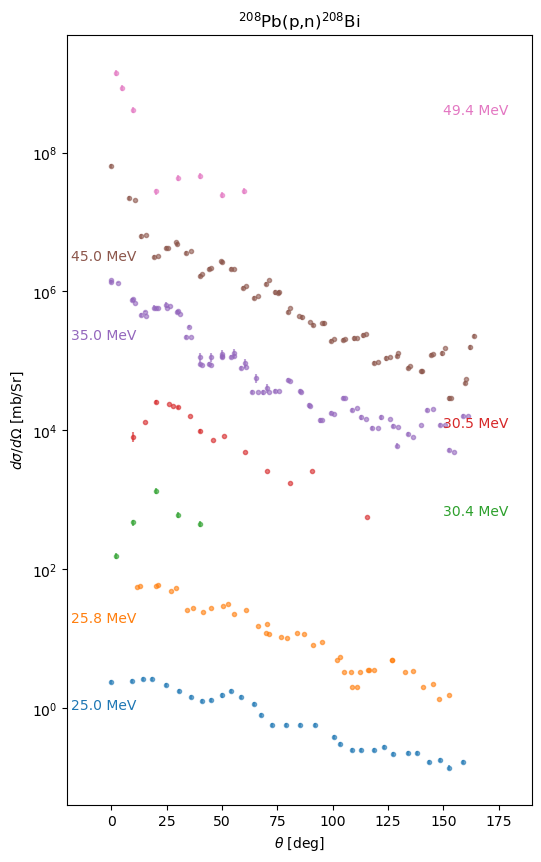

In [62]:
plot_measurements(
    all_qepn_measurements[Pb208],
    rxn_names[Pb208],
    constant_factor=20,
)

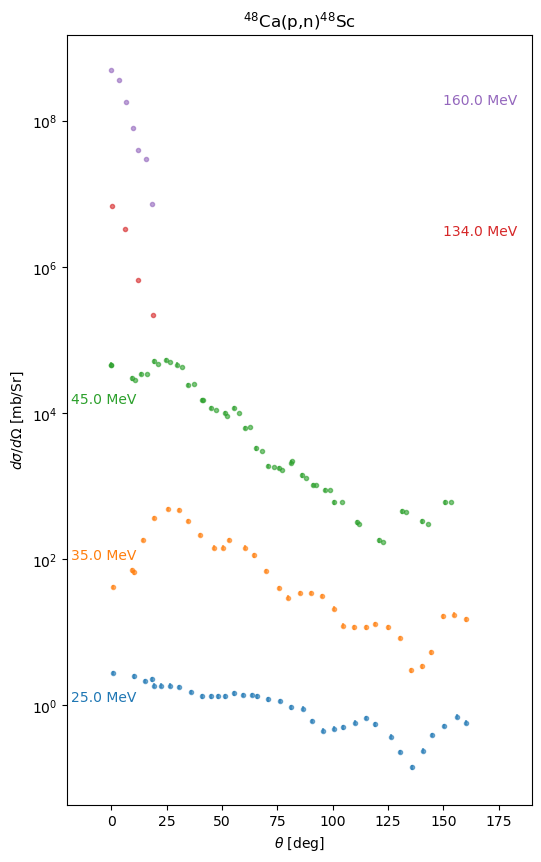

In [75]:
plot_measurements(
    all_qepn_measurements[Ca48],
    rxn_names[Ca48],
    constant_factor=100,
)

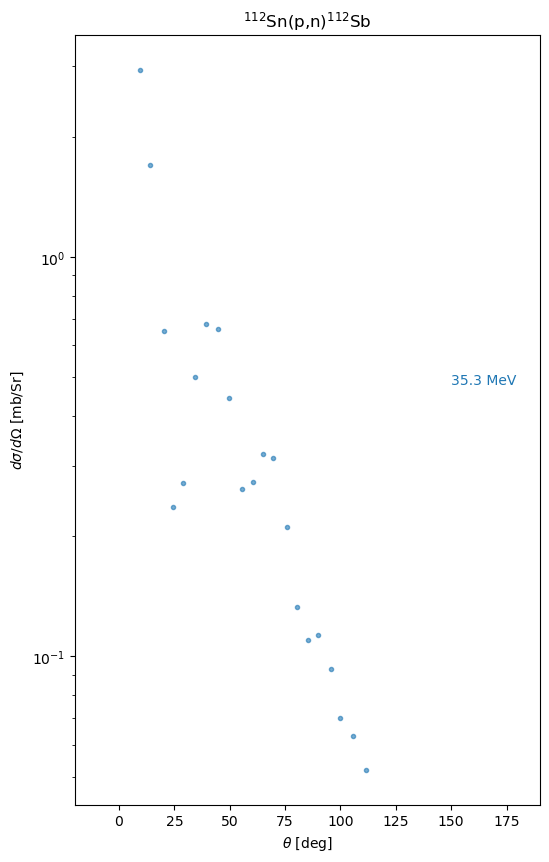

In [69]:
plot_measurements(
    all_qepn_measurements[Sn112],
    rxn_names[Sn112],
    constant_factor=20,
)

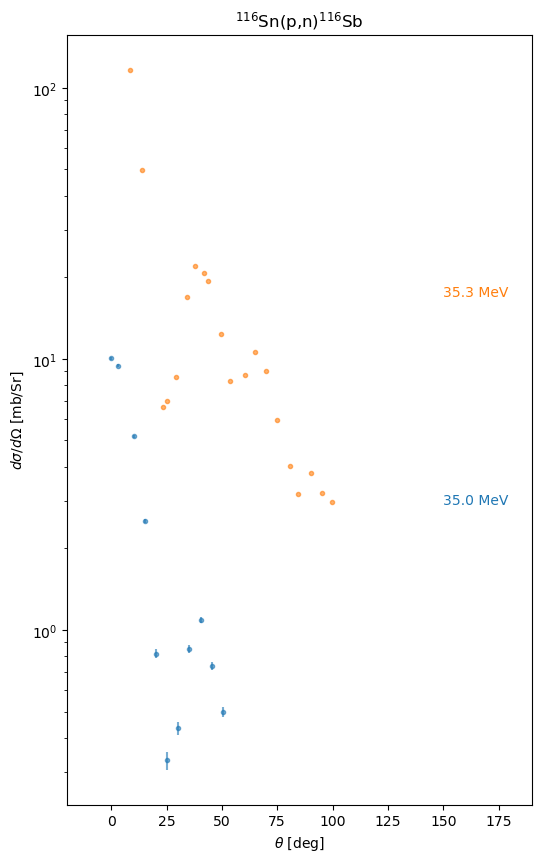

In [70]:
plot_measurements(
    all_qepn_measurements[Sn116],
    rxn_names[Sn116],
    constant_factor=20,
)

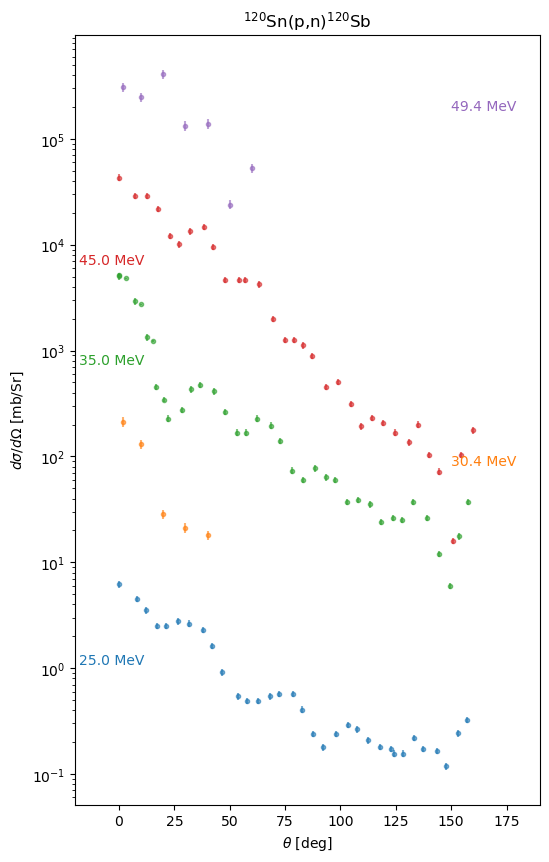

In [66]:
plot_measurements(
    all_qepn_measurements[Sn120],
    rxn_names[Sn120],
    constant_factor=20,
)

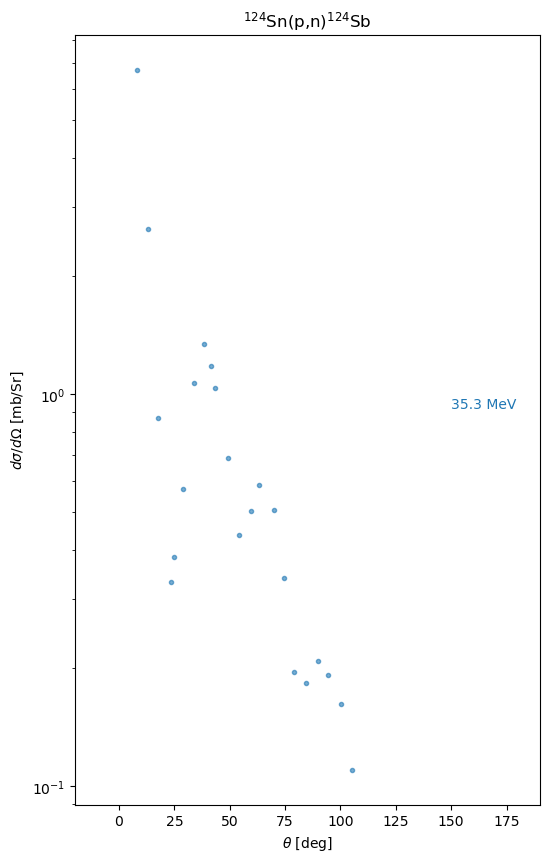

In [71]:
plot_measurements(
    all_qepn_measurements[Sn124],
    rxn_names[Sn124],
    constant_factor=20,
)

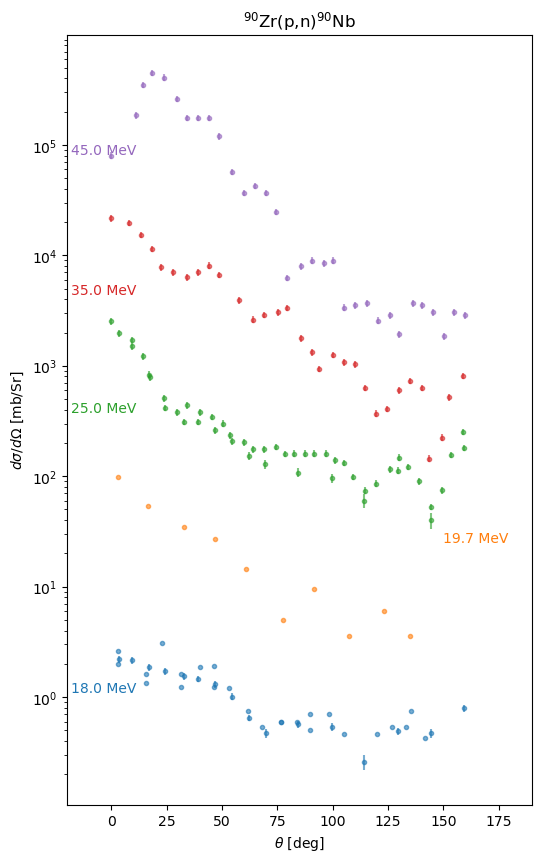

In [68]:
plot_measurements(
    all_qepn_measurements[Zr90],
    rxn_names[Zr90],
    constant_factor=20,
)

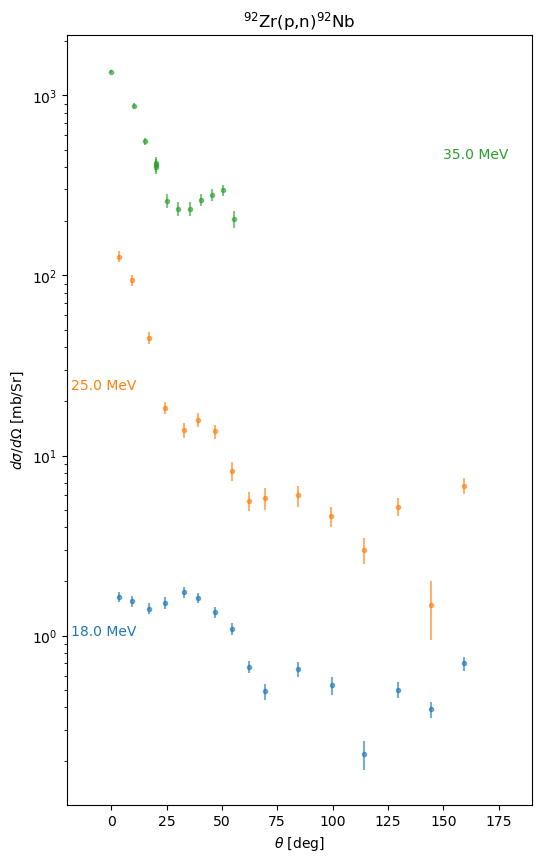

In [73]:
plot_measurements(
    all_qepn_measurements[Zr92],
    rxn_names[Zr92],
    constant_factor=20,
)

## Write data to disk

## Set up solvers for each isotope and energy
For each measurement, we will set up one solver for calibration, and one solver for visualization. These will use different angular grids.

In [30]:
core_solver = jitr.rmatrix.Solver(40)
channel_radius_fm = 20
lmax = 20
theta_vis = np.linspace(0.001, np.pi, 180)

In [31]:
def set_up_solver(target, Elab, Eias, angles_cal, angles_vis):
    analog = (target[0], target[1] + 1)
    kinp, kinn, Elab_n, Q, CDE = jitr.xs.quasielastic_pn.kinematics(
        target,
        analog,
        Elab,
        Eias,
    )
    sys = jitr.xs.quasielastic_pn.System(
        channel_radius_fm=channel_radius_fm,
        lmax=30,
        target=target,
        analog=analog,
        mass_target=jitr.utils.kinematics.mass(*target),
        mass_analog=jitr.utils.kinematics.mass(*analog),
        kp=kinp.k,
        kn=kinn.k,
    )
    workspace = jitr.xs.quasielastic_pn.Workspace(
        sys,
        kinp,
        kinn,
        Elab,
        Elab_n,
        core_solver,
        angles=angles_cal,
        tmatrix_abs_tol=1.0e-12,
    )
    workspace_vis = jitr.xs.quasielastic_pn.Workspace(
        sys,
        kinp,
        kinn,
        Elab,
        Elab_n,
        core_solver,
        angles=angles_vis,
        tmatrix_abs_tol=1.0e-12,
    )

    return workspace, workspace_vis

In [32]:
build_all_solvers = False
ws_dir = Path("./workspaces/")

if build_all_solvers:
    workspaces = {}
    for isotope in tqdm(isotopes):
        workspaces[isotope] = []

        for measurement in all_qepn_measurements[isotope]:
            theta = measurement.data[0, :] * np.pi / 180
            Elab = measurement.Elab
            workspaces[isotope].append(
                set_up_solver(isotope, Elab, ExIAS[isotope], theta, theta_vis)
            )

    for isotope in tqdm(isotopes):
        for i, measurement in enumerate(all_qepn_measurements[isotope]):
            Elab = measurement.Elab

            solver_cal, solver_vis = workspaces[isotope][i]
            solver_cal.save(
                ws_dir / f"workspace_A_{isotope[0]}_Z_{isotope[1]}_qepn_E_{i}.pickle"
            )
            solver_vis.save(
                ws_dir
                / f"vis_workspace_A_{isotope[0]}_Z_{isotope[1]}_qepn_E_{i}.pickle"
            )

            assert np.all(solver_cal.angles == measurement.data[0, :] * np.pi / 180)
else:
    workspaces = {}
    for isotope in tqdm(isotopes):
        workspaces[isotope] = []
        for i, measurement in enumerate(all_qepn_measurements[isotope]):
            Elab = measurement.Elab

            solver_cal = jitr.xs.quasielastic_pn.Workspace.load(
                ws_dir / f"workspace_A_{isotope[0]}_Z_{isotope[1]}_qepn_E_{i}.pickle"
            )
            solver_vis = jitr.xs.quasielastic_pn.Workspace.load(
                ws_dir
                / f"vis_workspace_A_{isotope[0]}_Z_{isotope[1]}_qepn_E_{i}.pickle"
            )
            workspaces[isotope].append((solver_cal, solver_vis))

NameError: name 'tqdm' is not defined

In [ ]:
pn_num = 0
pn_num_meas = 0
for isotope in isotopes:
    name = str(elements[isotope[1]].symbol)

    num = np.array([m.data.shape[1] for m in all_qepn_measurements[isotope]])
    pn_num += np.sum(num)
    pn_num_meas += num.shape[0]
    print(f"{np.sum(num)} data points in {num.shape[0]} data sets")

    Ep = [m.Elab for m in all_qepn_measurements[isotope]]
    plt.hist(Ep)
    plt.title(f"$^{{{isotope[0]}}}${name} $(p,n)$ data sets")
    plt.xlabel(r"$E_{lab}$ [Mev]")
    plt.show()

In [ ]:
print(f"In total {pn_num} data points in {pn_num_meas} sets for (p,n)")